# Assignment 4

 

**Due: Sunday, 06 October 2019**

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [80]:
# import a few more libraries form statsmodels (new)
import statsmodels.api as sm

In [81]:
# import sklearn - logistic
from sklearn.linear_model import LogisticRegression as Logit
# import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

In [82]:
from scipy import stats
import scipy as sp
import statsmodels.api as sm

## Questions 1-4
The file **Party.xlsx** contains data on a sample of voters with tracked variables, including their party preference (Party=1 or 0), age, whether they own a home, gender, marital status, household size, income, years of education, and whether they attend church. Note that the goal of this exercise is to predict voting preference (Party) with a set of individual's characteristics. 

In [83]:
# Load data
p=pd.read_excel('Party(1).xlsx')
p.head()

,Party,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church
0,1,51,1,1,1,4,171.0,15,0
1,1,37,1,1,1,3,96.0,18,0
2,1,53,1,1,1,6,86.0,20,0
3,0,33,1,1,1,2,176.0,18,1
4,0,46,1,1,1,6,420.0,15,1


In [84]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Party            10000 non-null int64
Age              10000 non-null int64
HomeOwner        10000 non-null int64
Female           10000 non-null int64
Married          10000 non-null int64
HouseholdSize    10000 non-null int64
Income           10000 non-null float64
Education        10000 non-null int64
Church           10000 non-null int64
dtypes: float64(1), int64(8)
memory usage: 703.2 KB


**[Q1]** Create a random partition of the dataset (p) with 75% of observations in the training set and the reaming 25% in the test set. Use the train_test_split from sklearn to do the partition, set random_state=12345. Report the sample mean from each of the variables in both train and test sets, separately. Are the corresponding mean values from train and test sets roughly the same? (1 mark)

In [85]:
y = p['Party']
X = p.drop('Party', axis=1)
# 75% traing & 24% test, random_state (seed) = 12345
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

In [86]:
sp.mean(X_train)

Age               47.310400
HomeOwner          0.839200
Female             0.790800
Married            0.746800
HouseholdSize      3.351600
Income           101.366388
Education         15.041733
Church             0.501733
dtype: float64

In [87]:
sp.mean(X_test)

Age              47.6300
HomeOwner         0.8492
Female            0.7776
Married           0.7512
HouseholdSize     3.3060
Income           99.3740
Education        15.2076
Church            0.5028
dtype: float64

In [88]:
sp.mean(y_train)

0.40066666666666667

In [89]:
sp.mean(y_test)

0.4036

#### the  mean values from train and test sets are roughly the same 

**[Q2]** Use data from the train set to run a logisitc regression of Party on all other variables. Report the estimated coefficients. Does Female tend to support Party=1? How about Income and Education, respectively? Report the fitted (i.e. in-sample prediction) accuracy. What does the accuarcy measure imply? (2 marks)

In [90]:
model = Logit()
results = model.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [91]:
# The coefficients
print('Logit Coefficients: \n', model.coef_)

Logit Coefficients: 
 [[-0.0134641   0.56124881  1.18343623  0.17079065  0.18154563 -0.00621388
   0.21091127 -1.66541195]]


In [92]:
# DataFrame report
coef=pd.DataFrame(model.coef_)
coef.columns=X_train.columns
coef

,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church
0,-0.013464,0.561249,1.183436,0.170791,0.181546,-0.006214,0.210911,-1.665412


#### From the model output, female has a positive and relatively large coefficient 1.18, female tend to support party = 1

#### Income has a negative and small coefficient -0.006, high income is not supporting party = 1

#### Education has a positive and moderate coefficient 0.21, high education is supporting party = 1

In [93]:
model.score(X_train,y_train)

0.7517333333333334

#### The accuracy is 75.17% which implies the model predicts 75% of the training records correctly where the prediction is equivalent to the label Party

**[Q3]** Apply the fitted model from Q2 to the test set. What is the predicted ratio of individuals considering to vote for Party=0? What is the actual ratio supporting Party=0 from the test set? Find the (out-sample) prediction accuracy (2 marks).

In [94]:
X_test

,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church
7867,42,1,0,1,4,177.0,18,0
1402,41,1,0,1,3,85.0,20,0
8606,51,1,1,1,5,68.0,20,1
8885,29,0,0,1,5,96.0,15,1
6494,36,1,1,1,4,23.0,18,1
...,...,...,...,...,...,...,...,...
2149,54,1,0,1,2,155.0,20,1
6328,46,1,1,0,1,66.0,18,0
3952,60,1,1,1,4,73.0,20,0
7480,27,1,0,1,2,109.0,15,0


In [95]:
# model prediction on the test set
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 0])

In [102]:
# predicted ratio for party = 0
y_pred_pd = pd.Series(y_pred)
y_pred_pd.value_counts()

0    1605
1     895
dtype: int64

#### The predicted ratio is (1605/ (1605 + 895))  * 100% = 64.2%

In [98]:
# actual ratio for party = 0
y_test.value_counts()

0    1491
1    1009
Name: Party, dtype: int64

#### The actual ratio is (1491/ (1491 + 1009))  * 100% = 59.64%

In [63]:
print('Test:', model.score(X_test, y_test))

Test: 0.7296


#### The out sample prediction accuracy is 72.96%

**[Q4]** Obtain the confusion matrix and the associated classification report based on the results from Q3. Interpret the outcomes of precision and recall (1.5 marks).

In [103]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1210  281]
 [ 395  614]]


In [104]:
# import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78      1491
           1       0.69      0.61      0.64      1009

   micro avg       0.73      0.73      0.73      2500
   macro avg       0.72      0.71      0.71      2500
weighted avg       0.73      0.73      0.73      2500



#### The precision is the ratio tp/(tp+fp) = 1210/(1210+395) = 75.39% which represents the model's ability to classify the input as positive when the actual label is negative. The recall is the ratio tp/(tp+fn) = 1210/(1210+281) = 81.15% which represents the model's ability to correctly classify all positive records.

## Questions 5-7

Your neighbor is a real estate agent and wants some help predicting housing prices for regions in the USA. It would be great if you could somehow create a model for her that allows her to put in a few features of a house and returns back an estimate of what the house would sell for.

She has asked you if you could help her out with your new data science skills. You say yes, and decide that Linear Regression might be a good path to solve this problem!

Your neighbor then gives you some information about a bunch of houses in regions of the United States,it is all in the data set: **USA_Housing.csv**.

The data contains the following columns:

* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house

In [154]:
# Load data
H = pd.read_csv('USA_Housing(1).csv')
H.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [155]:
H.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


#### **Partition the data into a training set (70%) and a testing set (30%).  Use the train_test_split from sklearn to do the partition, set random_state=101.**

In [157]:
y = H['Price']
X = H.drop('Price', axis=1)
# train test split into 4 components: X_train, X_test, y_train, y_test
# 70% traing & 30% test, random_state (seed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

**[Q5]** Use the training set to regress **Price** on **3** features: **Avg. Area Income, Avg. Area House Age, Avg. Area Number of Rooms**. Report the estimated slope coefficents. How does the estimated results imply the effet of Ave. Area Income to house price? Find the R-squared. How does the R-squared inidicate the model fitness? (1.5 marks)

In [169]:
# Linear Regression
from sklearn.linear_model import LinearRegression as LR
lm = LR()
lm.fit(X_train[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms']],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [170]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [2.13469281e+01 1.64367849e+05 1.24728729e+05]


#### The slope coefficients are 21.3469 for Avg. Area Income, 1.644e+05 for Avg. Area House Age, and 1.247e+05 for Avg. Area Number of Rooms

#### The slope coefficient of Avg. Area Income is 21.3469, which implies that the independent variable Avg. Area Income has a positive linear relationship with the dependent variable house price, and the variable is significant (pvalue = 0.000) and each unit(1 dollar) increase in Avg. Area Income will increase the house price by 21.3469 dollars.

In [171]:
# R-squared
lm.score(X_train[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms']],y_train)

0.7347620424683743

#### The R-square for this model fit is 0.735, which implies that these 3 independent variables can explain 73.5% of the total variation in the dependent variable house price, which is fairly good.

**[Q6]** Use the fitted model from Q5 to predict the Price of the testing set. Plot the predicted Price and the actual Price with a scatterplot, adding a 45-degree line in the plot. Comment on the plot. Report Mean Absolute Error (MAE) and the Root Mean Squared Error (RMSE) (1 mark). 

In [172]:
# prediction on test set
y_pred = lm.predict(X_test[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms']])

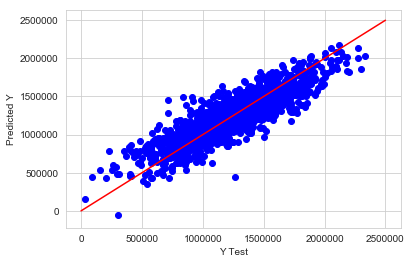

In [184]:
h = plt.plot(np.arange(0, 2500000), np.arange(0, 2500000), c='r')
plt.scatter(y_test, y_pred, c='b')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [188]:
from sklearn import metrics
# MAE
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 144884.51104565582


In [189]:
#RMSE
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 181086.87776702756


**[Q7]** Now, consider a training regression model of Price on 5 features: Avg. Area Income, Avg. Area House Age, Avg. Area Number of Rooms, Avg. Area Number of Bedrooms, Area Population and use the fitted model to predict the Price of the testing set. Does the 5-feature model show prediction improvement over the 3-feature model (of Q5-Q6)? Justify (2 marks). 
* Hint: Comapre the MAE and RMSE and make a scatterplot with Price predictions (from both models) against the actual Price.

In [190]:
lm = LR()
lm.fit(X_train[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']],y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [191]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [2.16176350e+01 1.65221120e+05 1.21405377e+05 1.31871878e+03
 1.52251955e+01]


In [193]:
# R-squared
print('R-squared', lm.score(X_train[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']],y_train))

R-squared 0.9177641115595528


In [195]:
y_pred2 = lm.predict(X_test[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']])

Text(0, 0.5, 'Predicted Y')

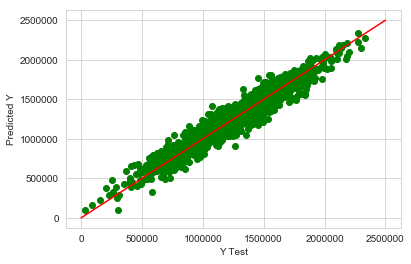

In [196]:
plt.scatter(y_test, y_pred2, c='green')
h = plt.plot(np.arange(0, 2500000), np.arange(0, 2500000), c='r')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [197]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 81257.55795856068
RMSE: 100842.08231635111


#### By comparing the MAE and RMSE, and model with more independent variables is much better in error optimization (minimize), and the model fit adequacy improves from 73% to 91% (R-squared). The scatter plot of the latter model forms a more narrow trend along the 45 degree line, which means that the prediction is closer to the actual value (accuracy improves).

## Questions 8-10

**Use the data in World_2017.xlsx to answer Questions 8-10.**

In [131]:
w=pd.read_excel("World_2017(1).xlsx")
w.head()

,country,Life Ladder,Log GDP per capita,Healthy life expectancy at birth
0,Afghanistan,2.661718,7.460144,52.339527
1,Albania,4.639548,9.373718,69.051659
2,Algeria,5.248912,9.540244,65.699188
3,Argentina,6.039330,9.843519,67.538704
4,Armenia,4.287736,9.034711,65.125687


**[Q8]** Use heatmap to show missing data. List **countries** that are with missing data and drop these countries from w. Let's call the missing-free DataFrame **ww**. How many countries are in ww?(1 mark) 

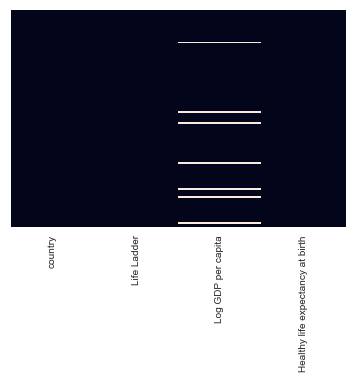

In [133]:
sns.heatmap(w.isnull(),yticklabels=False,cbar=False)

In [134]:
w.isnull().sum()

country                             0
Life Ladder                         0
Log GDP per capita                  7
Healthy life expectancy at birth    0
dtype: int64

In [135]:
# locate (find the index) the missing value rows
drop_index = w[w['Log GDP per capita'].isnull()].index
drop_index

Int64Index([21, 66, 73, 99, 116, 121, 138], dtype='int64')

In [136]:
# drop these countries with missing values
w.drop(drop_index, inplace=True)

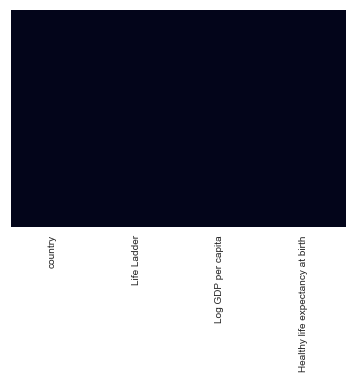

In [137]:
# check all countries with missing values have been dropped
sns.heatmap(w.isnull(),yticklabels=False,cbar=False)

In [138]:
len(w['country'].unique())

134

#### there are 134 countries in the missing free dataframe

**[Q9]** Use **Log GDP per capita** and **Healthy life expectancy at birth** in **ww** to do clustering with the K-means algorithm. Apply the Elbow curve (based on inertia & random_state=101) to decide the optial number of clusters. How many countries are included in each cluster?(2 marks)

In [141]:
# import KMeans from sklearn.cluster
from sklearn.cluster import KMeans
w2 = w[['Log GDP per capita','Healthy life expectancy at birth']]
w2.head(5)

,Log GDP per capita,Healthy life expectancy at birth
0,7.460144,52.339527
1,9.373718,69.051659
2,9.540244,65.699188
3,9.843519,67.538704
4,9.034711,65.125687


In [142]:
# inertia_: Sum of Squared Distances
inertia = []
for k in range(2, 20):
    KM = KMeans(n_clusters=k, random_state=101)
    KM.fit(w2)
    inertia.append(KM.inertia_)
inertia

[2164.0977321380233,
 1014.4993701653491,
 589.1748231247823,
 413.4145442392235,
 295.11827645961944,
 223.0748349801887,
 179.01431792902451,
 144.03958572912734,
 117.89177224097298,
 104.74330289609117,
 94.36993206830483,
 85.22484444103956,
 78.31572173900885,
 73.18176024597034,
 69.41495398395278,
 66.03987845936841,
 58.602891086237804,
 55.90395205072362]

Text(0.5, 1.0, 'Elbow curve')

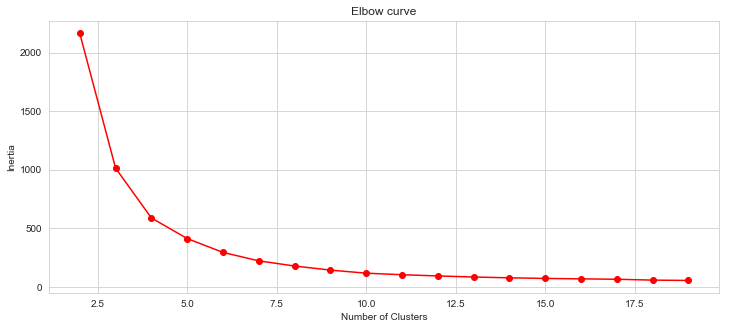

In [144]:
# plot elblow curve
fig = plt.figure(figsize=(12, 5))
plt.plot(range(2, 20), inertia, 'ro-')
plt.grid(True)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve')

#### Optimal number of clusters: 3 or 4. we will go for 4 clusters

In [147]:
KM = KMeans(n_clusters=4, random_state=101)
KM.fit(w2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=101, tol=0.0001, verbose=0)

In [148]:
w['cluster'] = KM.labels_
w.head()

,country,Life Ladder,Log GDP per capita,Healthy life expectancy at birth,cluster
0,Afghanistan,2.661718,7.460144,52.339527,2
1,Albania,4.639548,9.373718,69.051659,1
2,Algeria,5.248912,9.540244,65.699188,3
3,Argentina,6.039330,9.843519,67.538704,3
4,Armenia,4.287736,9.034711,65.125687,3


In [150]:
# the number of countries in each cluster
w['cluster'].value_counts()

3    52
1    38
0    23
2    21
Name: cluster, dtype: int64

#### cluster 0 has 23 countries, cluster 1 has 38 countries, cluster 2 has 21 countries, cluster 3 has 52 countries.

**[Q10]** Obtain violinplot of **Log GDP per capita** for each of the clusters (in one graph). Comment on the plot (1 mark).

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


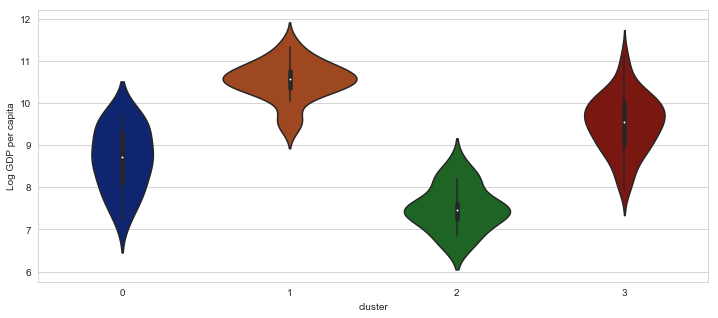

In [153]:
plt.figure(figsize=(12,5))
sns.violinplot(x="cluster", y="Log GDP per capita", data=w, palette="dark", split=True)

#### The plots shows that cluster 1 has the largest median and cluster 2 has the smallest median, the cluster 0 has the largest IQR, we can also see their kernal density plot on each side of the clusters